In [52]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [53]:
age = titanic['age']
age.head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [54]:
age.shape

(891,)

In [55]:
missing_age = age.isnull().sum(); missing_age

177

In [56]:
percent_age_nan = missing_age / age.size * 100; percent_age_nan

19.865319865319865

In [57]:
mean_age = age.mean().round(); mean_age

30.0

In [60]:
age.fillna(mean_age, inplace=True)
age.head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    30.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

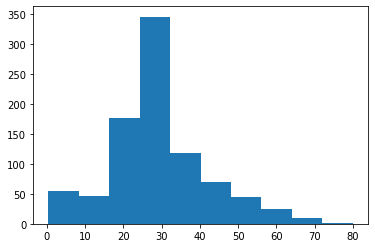

In [63]:
import matplotlib.pyplot as plt
plt.hist(age)
plt.show()

In [67]:
min_val = age.mean() - 3 * age.std()
min_val # no outliers

-9.24882123057397

In [69]:
max_age = age.mean() + 3 * age.std()
max_age

68.76659900835175

In [72]:
outliers = age[age > max_age]
outliers.count()

7

In [74]:
outliers.size

7

In [75]:
age = age[age < max_age]
age.shape

(884,)

## Feature engineering: encode

In [77]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [83]:
em_town = titanic['embark_town']
em_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [86]:
enc = LabelEncoder()
new_label = pd.Series(enc.fit_transform(em_town.astype('str')))
new_label

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Length: 891, dtype: int64

## Normalizing and Standardizing Data

In [89]:
age_normalized = (age - age.min()) / (age.max() - age.min())
age_normalized.head(10)

0    0.329064
1    0.573041
2    0.390058
3    0.527295
4    0.527295
5    0.451052
6    0.817017
7    0.024093
8    0.405306
9    0.207075
Name: age, dtype: float64

In [90]:
age_standardized = (age - age.mean()) / age.std()
age_standardized.head(10)

0   -0.594548
1    0.687225
2   -0.274105
3    0.446892
4    0.446892
5    0.046338
6    1.968998
7   -2.196765
8   -0.193994
9   -1.235435
Name: age, dtype: float64